In [102]:
# import packages

# for data analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, get_scorer_names, r2_score
from sklearn.tree import plot_tree
from sklearn import preprocessing

# For saving models
import pickle

In [103]:
# read in the cleaned dataset
f1 = pd.read_csv('data/f1_master_cleaned.csv')

In [104]:
f1.sample(10)

,position,driverId,constructorId,gap,gridPosition,round,year,circuitId,fp1_position,fp1_gap,...,position_minus1,fantasy_points_minus1,position_minus2,fantasy_points_minus2,position_minus3,fantasy_points_minus3,position_minus4,fantasy_points_minus4,position_minus5,fantasy_points_minus5
1917,17,kubica,williams,59.978,20.0,13,2019,belgium,20.0,4.392,...,19.0,2,10.0,17,15.0,9,20.0,0,18.0,4
2207,7,norris,mclaren,43.774,10.0,7,2020,belgium,10.0,0.781,...,10.0,2,9.0,5,5.0,16,13.0,-2,5.0,17
1746,6,gasly,red-bull,19.576,6.0,5,2019,spain,8.0,1.334,...,NaN,-25,6.0,33,8.0,13,11.0,11,NaN,-20
2688,11,latifi,williams,23.743,13.0,14,2021,italy,18.0,2.516,...,16.0,-2,9.0,8,7.0,26,14.0,8,16.0,4
802,5,vettel,ferrari,26.334,5.0,20,2016,brazil,9.0,1.672,...,5.0,18,4.0,41,4.0,39,NaN,-14,5.0,37
4198,4,hamilton,mercedes,36.483,16.0,24,2024,abu-dhabi,3.0,0.485,...,12.0,-1,2.0,34,10.0,12,4.0,21,NaN,-20
468,1,verstappen,red-bull,0.000,4.0,5,2016,spain,6.0,1.634,...,NaN,-18,8.0,8,6.0,17,10.0,2,16.0,-5
892,11,wehrlein,sauber,59.978,13.0,3,2017,bahrain,18.0,3.262,...,14.0,4,15.0,8,NaN,-20,17.0,6,20.0,0
227,8,ricciardo,red-bull,59.978,19.0,12,2015,italy,7.0,2.252,...,NaN,-15,3.0,34,NaN,-19,10.0,9,13.0,-2
2709,12,vettel,aston-martin,59.978,10.0,15,2021,russia,5.0,1.354,...,12.0,-1,13.0,8,5.0,16,NaN,-19,NaN,-19


# Method 1: Linear Regression
As a first baseline, see how good a model can perform based just on grid position alone.

In [105]:
f1_grid_only = f1[['fantasy_points','gridPosition']].dropna()

f1_grid_only = f1_grid_only[f1_grid_only['gridPosition'] <= 10]

X_grid_only = f1_grid_only['gridPosition']
y_grid_only = f1_grid_only['fantasy_points']
X_grid_only = np.array(X_grid_only).reshape(-1, 1)

grid_model = LinearRegression()
grid_model.fit(X_grid_only, y_grid_only)

y_grid_pred = grid_model.predict(X_grid_only)

print("R-squared (grid):", r2_score(y_grid_only, y_grid_pred))

R-squared (grid): 0.27864657504483437


In [106]:
f1_grid_only = f1[['position_num','gridPosition']].dropna()

#f1_grid_only = f1_grid_only[f1_grid_only['gridPosition'] <= 10]

X_grid_only = f1_grid_only['gridPosition']
y_grid_only = f1_grid_only['position_num']
X_grid_only = np.array(X_grid_only).reshape(-1, 1)

grid_model = LinearRegression()
grid_model.fit(X_grid_only, y_grid_only)

y_grid_pred = grid_model.predict(X_grid_only)

print("R-squared (grid):", r2_score(y_grid_only, y_grid_pred))

R-squared (grid): 0.5509188364099922


In [107]:
# linear regression requires no 'NaN' values
f1_sub = f1.dropna()

f1_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 4199
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   position               800 non-null    object 
 1   driverId               800 non-null    object 
 2   constructorId          800 non-null    object 
 3   gap                    800 non-null    float64
 4   gridPosition           800 non-null    float64
 5   round                  800 non-null    int64  
 6   year                   800 non-null    int64  
 7   circuitId              800 non-null    object 
 8   fp1_position           800 non-null    float64
 9   fp1_gap                800 non-null    float64
 10  fp2_position           800 non-null    float64
 11  fp2_gap                800 non-null    float64
 12  fp3_position           800 non-null    float64
 13  fp3_gap                800 non-null    float64
 14  qual_position          800 non-null    float64
 15  q1   

In [108]:
# list of the columns used for prediction
lin_predictors = ['driverId','constructorId','gridPosition',
                  'fp1_position','fp1_gap','fp2_position','fp2_gap','fp3_position','fp3_gap',
                 'q1','q2','q3','risky_circuit',
                 'position_minus1','fantasy_points_minus1',
                 'position_minus2','fantasy_points_minus2',
                 'position_minus3','fantasy_points_minus3']

X = f1_sub[lin_predictors]

y_lin = f1_sub['position_num']

# create dummy variables
X_lin = pd.get_dummies(X, ['driverId','constructorId'])

# Split data into training and testing sets
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Create a Linear Regression model
lin_model = LinearRegression()


In [109]:
lin_model.fit(X_lin_train, y_lin_train)

y_lin_train_pred = lin_model.predict(X_lin_train)
y_lin_test_pred = lin_model.predict(X_lin_test)

print("R-squared (train):", r2_score(y_lin_train, y_lin_train_pred))
print("R-squared (test):", r2_score(y_lin_test, y_lin_test_pred)) 

R-squared (train): 0.5275607603411729
R-squared (test): 0.43158681492471285


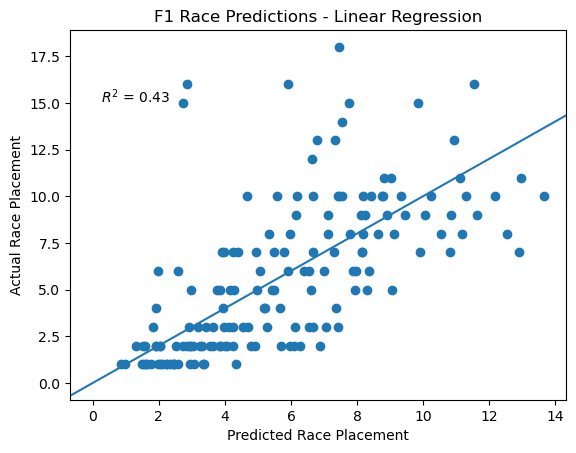

In [110]:
fig = plt.scatter(y_lin_test_pred, y_lin_test)
plt.title('F1 Race Predictions - Linear Regression')
plt.xlabel('Predicted Race Placement')
plt.ylabel('Actual Race Placement')
plt.axline((0,0), slope=1)
plt.text(0.25, 15, '$R^2$ = '+ str(round(r2_score(y_lin_test, y_lin_test_pred), 2)))
plt.show()

Linear regression models shows reasonable performance. Note that the model doesn't predict many placements above 14. This is because we removed all drivers who did not make it to q3 in qualifying.

Now let's create a model that predicts fantasy points instead of placement

In [111]:
y_lin = f1_sub['fantasy_points']
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

lin_model_pts = LinearRegression()

lin_model_pts.fit(X_lin_train, y_lin_train)

y_lin_train_pred = lin_model_pts.predict(X_lin_train)
y_lin_test_pred = lin_model_pts.predict(X_lin_test)

print("R-squared (train):", r2_score(y_lin_train, y_lin_train_pred))
print("R-squared (test):", r2_score(y_lin_test, y_lin_test_pred)) 

R-squared (train): 0.5459875254836499
R-squared (test): 0.49573033842501213


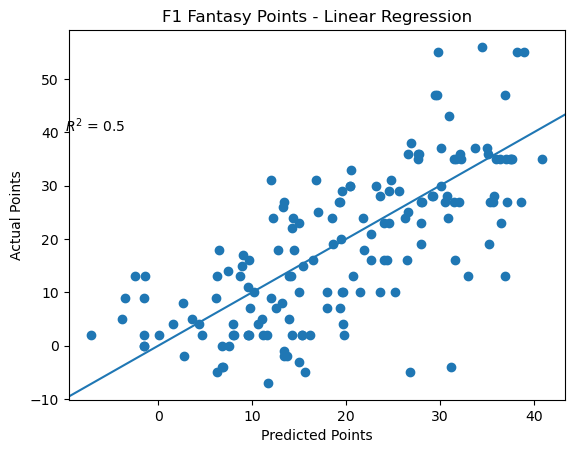

In [112]:
fig = plt.scatter(y_lin_test_pred, y_lin_test)
plt.title('F1 Fantasy Points - Linear Regression')
plt.xlabel('Predicted Points')
plt.ylabel('Actual Points')
plt.axline((0,0), slope=1)
plt.text(-10, 40, '$R^2$ = '+ str(round(r2_score(y_lin_test, y_lin_test_pred), 2)))
plt.show()

This plot seems to indicate the model is overfitting the data. Predicting points less than 0 seems suspect. Is it predicting a dnf? Or did someone who normally finishes near the bottom get a fortunate grid placement and is expected to lose lots of places?

Now let's try a couple models where we don't know the results of qualifying. This better represents the fantasy situation, where driver selections need to be made just based on the results of free practice.

In [113]:
# list of the columns used for prediction
lin_predictors = ['driverId','constructorId',
                  'fp1_position','fp1_gap','fp2_position','fp2_gap','fp3_position','fp3_gap','risky_circuit']

X = f1_sub[lin_predictors]

y_lin = f1_sub['fantasy_points']

# create dummy variables
X_lin = pd.get_dummies(X, ['driverId','constructorId'])

# Split data into training and testing sets
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Create a Linear Regression model
lin_model_pts = LinearRegression()

lin_model_pts.fit(X_lin_train, y_lin_train)

y_lin_train_pred = lin_model_pts.predict(X_lin_train)
y_lin_test_pred = lin_model_pts.predict(X_lin_test)

print("R-squared (train):", r2_score(y_lin_train, y_lin_train_pred))
print("R-squared (test):", r2_score(y_lin_test, y_lin_test_pred)) 

R-squared (train): 0.49885435287040625
R-squared (test): 0.4196341135228505


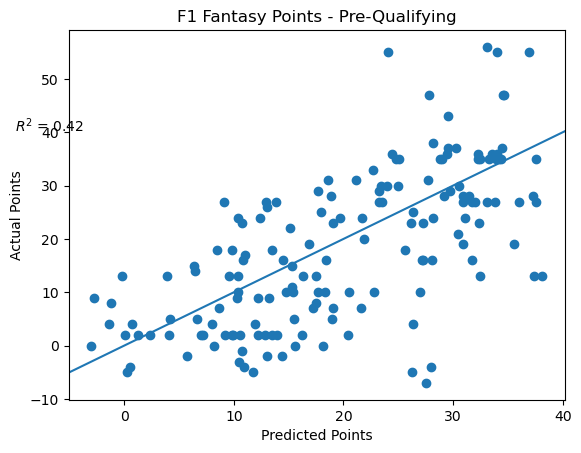

In [114]:
fig = plt.scatter(y_lin_test_pred, y_lin_test)
plt.title('F1 Fantasy Points - Pre-Qualifying')
plt.xlabel('Predicted Points')
plt.ylabel('Actual Points')
plt.axline((0,0), slope=1)
plt.text(-10, 40, '$R^2$ = '+ str(round(r2_score(y_lin_test, y_lin_test_pred), 2)))
plt.show()

By removing the qualifying results, the $R^2$ value of the model decreases from 0.51 to 0.46. This fairly small reduction suggests that similarly accurate predictions can be made based just on the results of free practice.

# Method 2: Logistic Regression
Use logistic regression to predict the odds of a driver winning a race. Test both pre- and post-qualifying results.

As a baseline, check how often the pole-sitter wins the race.

In [115]:
f1[f1['gridPosition'] == 1]['position'].value_counts(normalize=True)

1      0.528846
2      0.197115
3      0.091346
DNF    0.081731
4      0.048077
6      0.009615
5      0.009615
8      0.009615
9      0.009615
7      0.009615
15     0.004808
Name: position, dtype: float64

Based on just the historical data, the pole-sitter wins about 53% of the time. Let's see if additional data can aid prediction.

In [116]:
# First, check with post-qualifying results
lin_predictors = ['driverId','constructorId','gridPosition',
                  'fp1_position','fp1_gap','fp2_position','fp2_gap','fp3_position','fp3_gap',
                 'q1','q2','q3','risky_circuit',
                 'position_minus1','fantasy_points_minus1',
                 'position_minus2','fantasy_points_minus2',
                 'position_minus3','fantasy_points_minus3']

X = f1_sub[lin_predictors]

# create dummy variables
X_log = pd.get_dummies(X, ['driverId','constructorId'])

y_log = f1_sub['position_num']

# Split data into training and testing sets
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create a Linear Regression model
log_model = LogisticRegression(max_iter=1000)

In [117]:
log_model.fit(X_log_train, y_log_train)

y_log_train_pred = log_model.predict(X_log_train)
y_log_test_pred = log_model.predict(X_log_test)

print('Recall (train): ', recall_score(y_log_train, y_log_train_pred))
print('Recall (test): ', recall_score(y_log_test, y_log_test_pred))

C:\Users\Drew\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Method 3: XGBoost Reggressor
Use XGBoost to create a regressor model for predicting finishing place.

In [118]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   position               4214 non-null   object 
 1   driverId               4214 non-null   object 
 2   constructorId          4214 non-null   object 
 3   gap                    4214 non-null   float64
 4   gridPosition           4202 non-null   float64
 5   round                  4214 non-null   int64  
 6   year                   4214 non-null   int64  
 7   circuitId              4214 non-null   object 
 8   fp1_position           4003 non-null   float64
 9   fp1_gap                3896 non-null   float64
 10  fp2_position           3838 non-null   float64
 11  fp2_gap                3790 non-null   float64
 12  fp3_position           3769 non-null   float64
 13  fp3_gap                3694 non-null   float64
 14  qual_position          4136 non-null   float64
 15  q1  

In [119]:
# leave dnf's out of this predictor
non_dnf_mask = f1['dnf'] == 0

f1_xgb = f1[non_dnf_mask]

xgb_predictors = ['driverId','constructorId','round','circuitId',
                 'fp1_position','fp2_position','fp3_position','fp1_gap','fp2_gap','fp3_gap',
                 'qual_position','q1','q2','q3','gridPosition','risky_circuit',
                 'position_minus1','fantasy_points_minus1',
                 'position_minus2','fantasy_points_minus2']

X_xgb = f1_xgb[xgb_predictors]
X_xgb = pd.get_dummies(X_xgb,columns=['driverId','constructorId','circuitId'])

y_xgb = f1_xgb['position_num']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.1, random_state=42)

In [120]:
xgb = XGBRegressor(objective="reg:squarederror")  # Objective function for regression

cv_params = {'max_depth':[3, 6, None],
             'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.1]
             }
                   
xgb_cv = GridSearchCV(xgb, cv_params, cv=5, scoring='r2')

In [121]:
%%time
xgb_cv.fit(X_xgb_train, y_xgb_train)

CPU times: total: 10min 39s
Wall time: 1min 25s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 6, None],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

r2:  0.6579174977459589
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


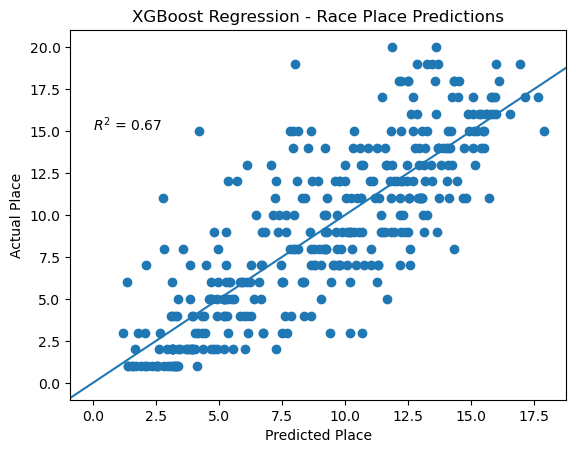

In [122]:
print('r2: ', xgb_cv.best_score_)
print(xgb_cv.best_params_)

y_xgb_test_pred = xgb_cv.best_estimator_.predict(X_xgb_test)

fig = plt.scatter(y_xgb_test_pred, y_xgb_test)
plt.title('XGBoost Regression - Race Place Predictions')
plt.xlabel('Predicted Place')
plt.ylabel('Actual Place')
plt.axline((0,0), slope=1)
plt.text(0, 15, '$R^2$ = '+ str(round(r2_score(y_xgb_test, y_xgb_test_pred), 2)))
plt.show()

In [123]:
len(xgb_cv.feature_names_in_)

122

XGBoost shows significant improvement over the linear regression model. It can additionally handle null values, allowing it to accurately predict racers starting near the back of the grid.

In [124]:
# now with the same predictors, change the output to fantasy points
y_xgb = f1_xgb['fantasy_points']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective="reg:squarederror")  # Objective function for regression

cv_params = {'max_depth':[3, 6, None],
             'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.1]
             }
                   
xgb_cv = GridSearchCV(xgb, cv_params, cv=5, scoring='r2')

In [125]:
%%time
xgb_cv.fit(X_xgb_train, y_xgb_train)

CPU times: total: 11min 11s
Wall time: 1min 36s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 6, None],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

r2:  0.5231180620515795
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


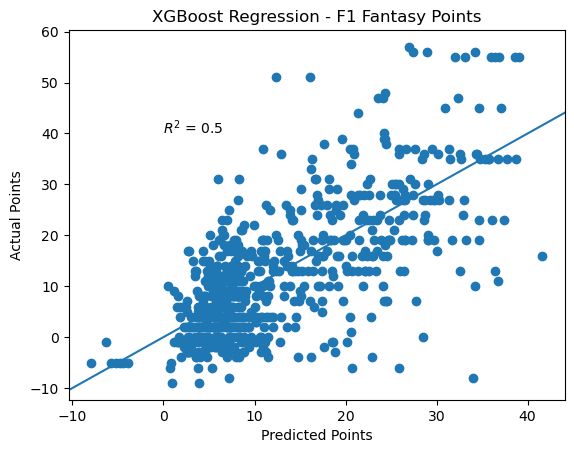

In [126]:
print('r2: ', xgb_cv.best_score_)
print(xgb_cv.best_params_)

y_xgb_test_pred = xgb_cv.best_estimator_.predict(X_xgb_test)

fig = plt.scatter(y_xgb_test_pred, y_xgb_test)
plt.title('XGBoost Regression - F1 Fantasy Points')
plt.xlabel('Predicted Points')
plt.ylabel('Actual Points')
plt.axline((0,0), slope=1)
plt.text(0, 40, '$R^2$ = '+ str(round(r2_score(y_xgb_test, y_xgb_test_pred), 2)))
plt.show()

The XGBoost model does marginally better than linear regression alone. There appears to be a larger spread of points than race positions, making it the harder item to predict.

In [127]:
# Now try without the post-qualifying metrics
xgb_predictors = ['driverId','constructorId','round','circuitId',
                 'fp1_position','fp2_position','fp3_position','fp1_gap','fp2_gap','fp3_gap','risky_circuit',
                 'position_minus1','fantasy_points_minus1',
                 'position_minus2','fantasy_points_minus2']

X_xgb = f1_xgb[xgb_predictors]
X_xgb = pd.get_dummies(X_xgb,columns=['driverId','constructorId','circuitId'])
print(len(X_xgb.columns))
y_xgb = f1_xgb['position_num']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

117


In [128]:
xgb = XGBRegressor(objective="reg:squarederror")  # Objective function for regression

cv_params = {'max_depth':[2, 3, 4, None],
             'n_estimators': [75, 100, 150],
             'learning_rate': [0.05, 0.1, 0.15]
             }
                   
xgb_cv = GridSearchCV(xgb, cv_params, cv=5, scoring='r2')

In [129]:
%%time
xgb_cv.fit(X_xgb_train, y_xgb_train)

CPU times: total: 10min 32s
Wall time: 1min 28s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4, None],
                         'n_estimators': [75, 100, 150]},
             scoring='r2')

r2:  0.6063150967828989
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75}


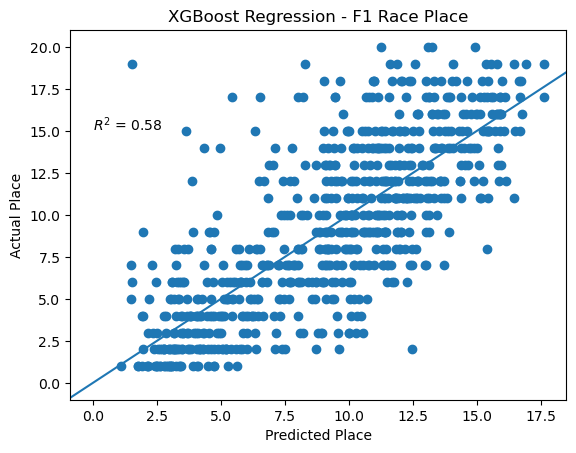

In [130]:
print('r2: ', xgb_cv.best_score_)
print(xgb_cv.best_params_)

y_xgb_test_pred = xgb_cv.best_estimator_.predict(X_xgb_test)

fig = plt.scatter(y_xgb_test_pred, y_xgb_test)
plt.title('XGBoost Regression - F1 Race Place')
plt.xlabel('Predicted Place')
plt.ylabel('Actual Place')
plt.axline((0,0), slope=1)
plt.text(0, 15, '$R^2$ = '+ str(round(r2_score(y_xgb_test, y_xgb_test_pred), 2)))
plt.show()

In [88]:
# and now, the same for fantasy points
y_xgb = f1_xgb['fantasy_points']

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective="reg:squarederror")  # Objective function for regression

cv_params = {'max_depth':[3, 6, None],
             'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.1]
             }
                   
xgb_cv = GridSearchCV(xgb, cv_params, cv=5, scoring='r2')

In [89]:
%%time
xgb_cv.fit(X_xgb_train, y_xgb_train)

CPU times: total: 9min 18s
Wall time: 1min 25s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 6, None],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

r2:  0.4808510824834853
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


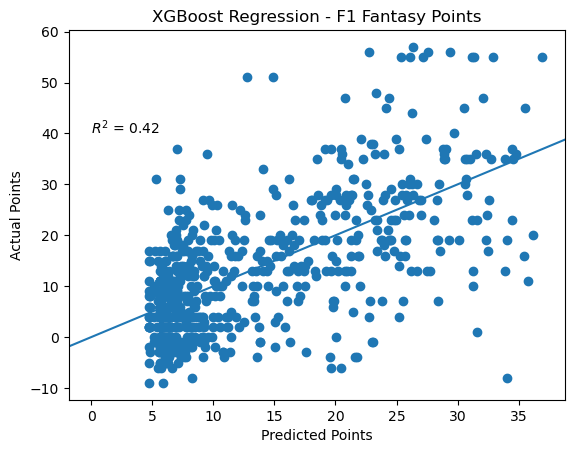

In [90]:
print('r2: ', xgb_cv.best_score_)
print(xgb_cv.best_params_)

y_xgb_test_pred = xgb_cv.best_estimator_.predict(X_xgb_test)

fig = plt.scatter(y_xgb_test_pred, y_xgb_test)
plt.title('XGBoost Regression - F1 Fantasy Points')
plt.xlabel('Predicted Points')
plt.ylabel('Actual Points')
plt.axline((0,0), slope=1)
plt.text(0, 40, '$R^2$ = '+ str(round(r2_score(y_xgb_test, y_xgb_test_pred), 2)))
plt.show()

The XGBoost model shows similar performance as the linear regressor when working only with pre-qualifying data.

# Method 4: XGBoost Classifier
Use XGBoost to identify winning probabilities

In [91]:
f1_xgb = f1.copy() # leave the dnf's in this time

xgb_predictors = ['driverId','constructorId','fp1_position','fp2_position','fp3_position'
                  ,'gridPosition','risky_circuit',
                 'position_minus1','fantasy_points_minus1',
                 'position_minus2','fantasy_points_minus2']

X_xgb = f1_xgb[xgb_predictors]
X_xgb = pd.get_dummies(X_xgb,columns=['driverId','constructorId'])

y_xgb = f1_xgb['position_num'] == 1

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [92]:
xgb = XGBClassifier(objective='binary:logistic')

cv_params = {'max_depth':[3, 6, None],
             'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.05, 0.1]
             }

scoring = {'accuracy','recall','f1'}

xgb_cv = GridSearchCV(xgb, cv_params, cv=5, scoring=scoring, refit='f1')

In [93]:
%%time
xgb_cv.fit(X_xgb_train, y_xgb_train)

CPU times: total: 8min 13s
Wall time: 1min 5s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, None],
                         'n_estimators': [100, 200, 300]},
             refit='f1', scoring={'accuracy', 'recall', 'f1'})

In [94]:
y_xgb_train_pred = xgb_cv.best_estimator_.predict(X_xgb_train)
y_xgb_test_pred = xgb_cv.best_estimator_.predict(X_xgb_test)

print('Accuracy (train): ', accuracy_score(y_xgb_train, y_xgb_train_pred))
print('Recall (train): ', recall_score(y_xgb_train, y_xgb_train_pred))
print('F1 (train): ', f1_score(y_xgb_train, y_xgb_train_pred))

print('Accuracy (test): ', accuracy_score(y_xgb_test, y_xgb_test_pred))
print('Recall (test): ', recall_score(y_xgb_test, y_xgb_test_pred))
print('F1 (test): ', f1_score(y_xgb_test, y_xgb_test_pred))

Accuracy (train):  0.9724117472560071
Recall (train):  0.5906432748538012
F1 (train):  0.6847457627118645
Accuracy (test):  0.9679715302491103
Recall (test):  0.42105263157894735
F1 (test):  0.5423728813559322


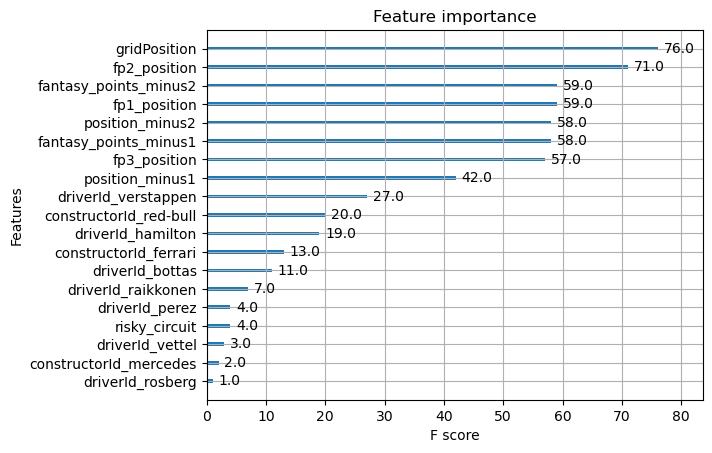

In [95]:
# Plot feature importance
plot_importance(xgb_cv.best_estimator_)
plt.show() 

The model is clearly overfitting the data here.

In [131]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [132]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [133]:
xgb_cv.best_estimator_
write_pickle('models/', xgb_cv, 'xgb_prequal_racepos')